In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("TMDB_movie_dataset_v11.csv")

In [5]:
print(df.head())

       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception 

In [ ]:
'''
3 Plots to be made:
  1. Visualise genre vs revenue
  2. ratings vs genres
  3. What keywords are part of the more popular movies?
'''

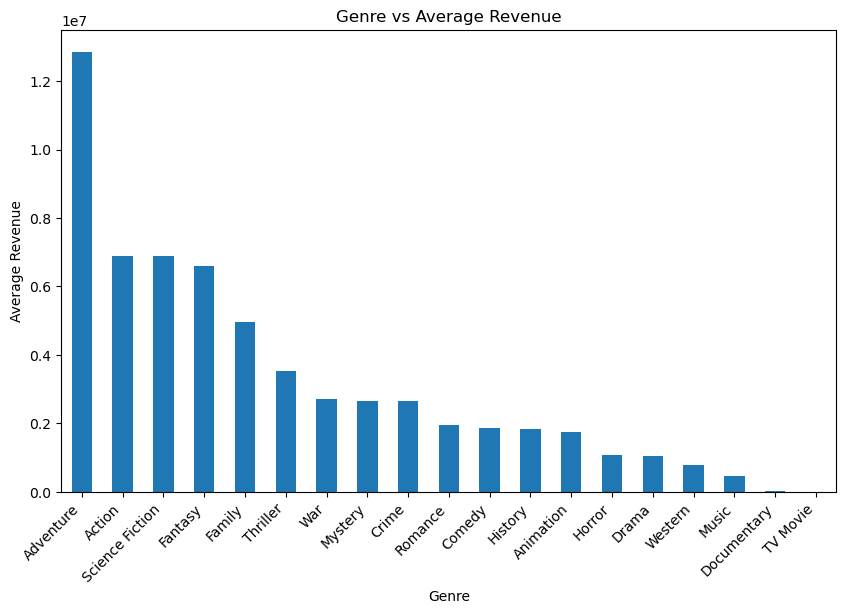

In [23]:
# Genre vs Revenue
df['genres'] = df['genres'].apply(lambda x: x.split(", ") if isinstance(x, str) else [])

# Step 2: Explode the 'genres' column to have one genre per row
df_exploded = df.explode('genres')

# Step 3: Group by 'genres' and calculate the average revenue for each genre
genre_revenue = df_exploded.groupby('genres')['revenue'].mean()

# Step 4: Sort the genre revenue data in descending order
genre_revenue = genre_revenue.sort_values(ascending=False)

# Step 5: Plot the results
genre_revenue.plot(kind="bar", figsize=(10, 6))
plt.title("Genre vs Average Revenue")
plt.xlabel("Genre")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45, ha="right")
plt.show()

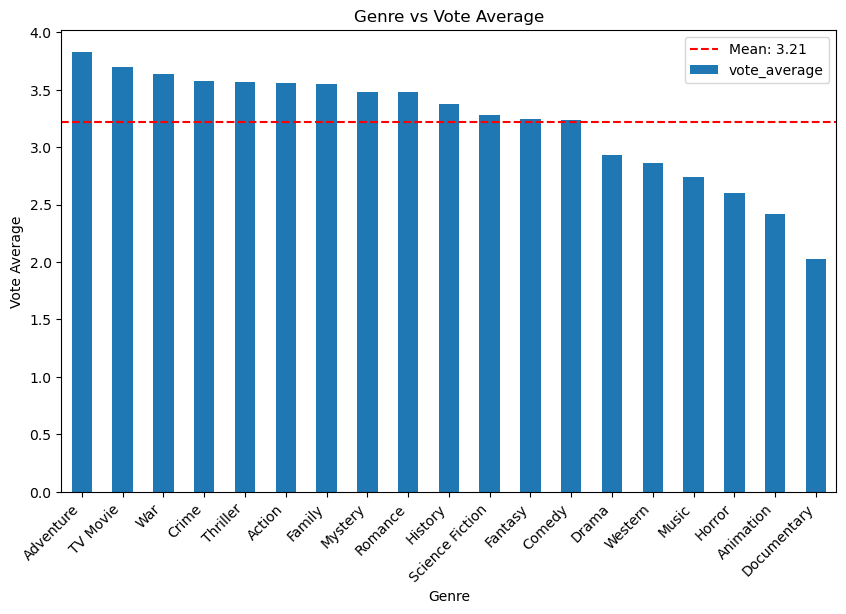

In [24]:
# Ratings vs Genres
genre_ratings = df_exploded.groupby('genres')['vote_average'].mean()
genre_ratings = genre_ratings.sort_values(ascending=False)

mean_vote = genre_ratings.mean()

# Step 5: Plot the results
genre_ratings.plot(kind="bar", figsize=(10, 6))
plt.title("Genre vs Vote Average")
plt.xlabel("Genre")
plt.ylabel("Vote Average")
plt.axhline(mean_vote, color="red", linestyle="--", label=f'Mean: {mean_vote:.2f}')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

In [25]:
# Keywords vs Popularity
df['keywords'] = df['keywords'].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
df_exploded_keywords = df.explode('keywords')
keyword_popularity = df_exploded_keywords.groupby('keywords')['popularity'].mean()

keyword_popularity = keyword_popularity.sort_values(ascending=False).head(10)

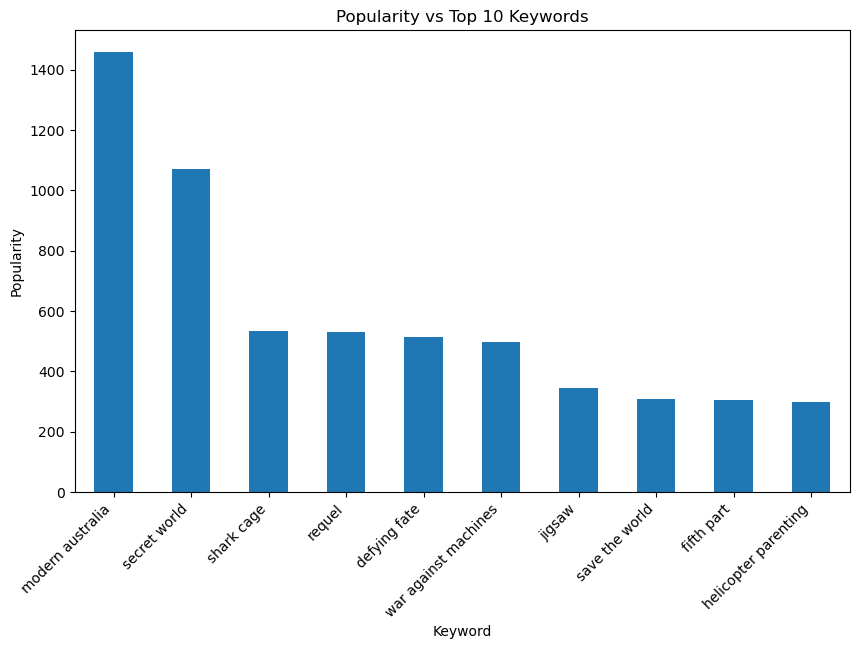

In [28]:
keyword_popularity.plot(kind="bar", figsize=(10, 6))
plt.title("Popularity vs Top 10 Keywords")
plt.xlabel("Keyword")
plt.ylabel("Popularity")
plt.xticks(rotation=45, ha="right")
plt.show()